In [1]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix,mean_squared_error, r2_score, classification_report
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
# Data collected by changing number of parameters in tango.py and was played among friends
# Dataset: (# of Parameters, Time in seconds)
# No. of Parameters = # of initially fixed suns/moons and x/=
data = [(8, 99), (9, 91),(10, 89),(10, 88),(10, 88),(11, 86),(11, 85),(11, 82),(12, 82),(12, 79),(12, 79),(12, 79),(12, 78),(12, 77),(12, 76),(12, 76),(12, 74),(12, 73),(12, 73),(12, 72),(12, 71),(12, 70),
        (12, 68),(13, 67),(13, 67),(13, 66),(13, 66),(13, 66),(13, 66),(13, 65),(13, 64),(14, 64),(14, 64),(14, 64),(14, 64),(14, 64),(14, 63),(14, 62),(14, 62),(14, 61),(14, 61),(14, 61),(14, 61),(14, 60),
        (14, 60),(14, 60),(14, 59),(15, 59),(15, 59),(15, 58),(15, 58),(15, 57),(15, 57),(15, 57),(16, 57),(16, 56),(16, 56),(16, 56),(16, 56),(16, 55),(16, 55),(16, 55),(16, 54),(16, 54),(16, 54),(16, 54),
        (16, 53),(16, 53),(16, 53),(16, 53),(16, 53),(17, 53),(17, 53),(18, 52),(18, 52),(18, 52),(18, 52),(18, 52),(18, 52),(18, 52),(18, 51),(18, 51),(18, 49),(18, 47),(18, 46),(18, 45),(18, 45),(18, 45),
        (19, 45),(19, 43),(20, 43),(20, 41),(20, 41),(20, 40),(20, 39),(20, 39),(20, 38),(20, 37),(21, 36),(21, 34),(27, 31),(20, 58),(21, 48),(9, 96),(12, 85),(10, 90),(25, 45),(9, 99),(9, 97),(11, 92),
        (13, 74),(14, 62),(22, 44),(11, 86),(23, 43),(18, 58),(18, 62),(25, 29),(12, 84),(13, 78),(15, 69),(27, 31),(14, 75),(27, 27),(8, 99),(13, 85),(23, 46),(13, 81),(18, 66),(17, 66),(22, 51),(18, 67),
        (24, 48),(21, 40),(15, 66),(20, 62),(21, 55),(12, 87),(18, 57),(21, 55),(12, 79),(12, 79),(23, 42),(13, 77),(17, 67),(27, 26),(16, 71),(10, 97),(12, 81),(15, 66),(12, 83),(16, 70),(14, 74),(11, 60),
        (16, 59),(15, 43),(16, 54),(13, 64),(18, 53),(16, 52),(12, 64),(18, 61),(21, 31),(20, 76),(18, 53),(15, 52),(14, 49),(12, 45),(12, 53),(16, 47),(12, 79),(9, 64),(16, 99),(18, 64),(17, 45),(19, 79),
        (14, 39),(15, 68),(18, 61),(14, 88),(8, 71),(15, 57),(20, 45),(20, 39),(20, 56),(16, 64),(18, 52),(13, 53),(16, 41),(27, 66),(18, 55),(13, 58),(16, 59),(14, 58),(16, 73),(12, 38),(12, 57),(13, 56),
        (14, 57),(14, 66),(15, 60),(14, 67),(14, 55),(21, 52),(17, 52),(11, 62),(16, 82),(15, 91),(18, 51),(12, 53),(16, 53),(13, 51),(12, 55),(20, 64),(10, 78)]

In [3]:
df = pd.DataFrame(data, columns=["Parameters", "Time"])

# KMeans clustering to label difficulty
kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Time']])
centers = kmeans.cluster_centers_.flatten()
sorted_centers = np.sort(centers)

threshold1 = ( sorted_centers[1] + sorted_centers[0] ) / 2
threshold2 = ( sorted_centers[2] + sorted_centers[1] ) / 2

def label_cluster(ttl):
    if ttl < threshold1:
        return 'Easy'
    elif ttl < threshold2:
        return 'Medium'
    else:
        return 'Hard'

In [4]:
print (sorted_centers)
print(threshold1)
print(threshold2)

[46.97647059 63.19767442 84.90909091]
55.087072503419975
74.05338266384778


In [5]:
label_cluster(40)

'Easy'

In [6]:
df['Level'] = df['Time'].map(label_cluster)
df[["Time", "Level"]][:10]

,Time,Level
0,99,Hard
1,91,Hard
2,89,Hard
3,88,Hard
4,88,Hard
5,86,Hard
6,85,Hard
7,82,Hard
8,82,Hard
9,79,Hard


In [7]:
# dataset extraction
X = pd.DataFrame(df['Parameters'], columns=['Parameters'])
y = df['Level']

print (X)
print (y)

     Parameters
0             8
1             9
2            10
3            10
4            10
..          ...
210          16
211          13
212          12
213          20
214          10

[215 rows x 1 columns]
0        Hard
1        Hard
2        Hard
3        Hard
4        Hard
        ...  
210      Easy
211      Easy
212      Easy
213    Medium
214      Hard
Name: Level, Length: 215, dtype: object


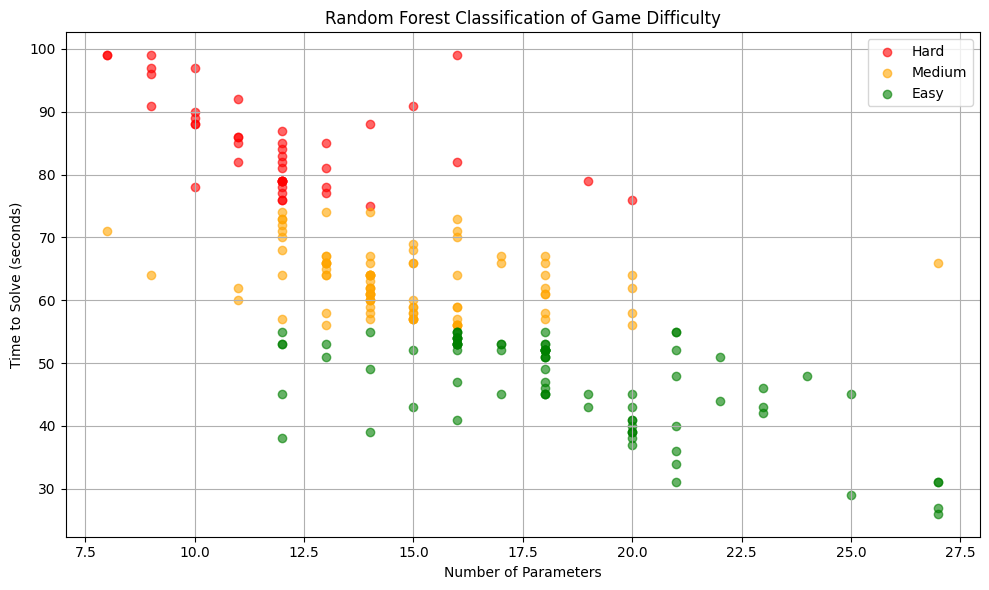

In [8]:
# Random Forest Classifier
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

clf = RandomForestClassifier(n_estimators=100, random_state=42)
clf.fit(X_train, y_train)

def get_game_level(model, num_params):
    input_df = pd.DataFrame({'Parameters': [num_params]})
    return model.predict(input_df)[0]

plt.figure(figsize=(10, 6))
colors = {'Easy': 'green', 'Medium': 'orange', 'Hard': 'red'}

# Scatter original points
for label in df['Level'].unique(): # easy, medium, hard
    # isolate each level
    subset = df[df['Level'] == label]
    plt.scatter(subset['Parameters'], subset['Time'], label=label, alpha=0.6, color=colors[label])

y_preds = clf.predict(X_train) # training accuracy

plt.xlabel("Number of Parameters")
plt.ylabel("Time to Solve (seconds)")
plt.title("Random Forest Classification of Game Difficulty")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [22]:
# User input
# 6x6 Grid – Max possible cells = 36
while True:
    try:
        user_input = input("Enter the number of parameters (0–36), or 'q' to quit: ")
        if user_input.lower() == 'q':
            print("Exiting...")
            break
        num = int(user_input)
        if not 0 <= num <= 36:
            print("Please enter a number between 0 and 36.")
            continue
        level = get_game_level(clf, num)
        print(f"Predicted Level: {level}")
    except ValueError:
        print("Invalid input. Please enter a valid integer.")

Enter the number of parameters (0–36), or 'q' to quit:  7


Predicted Level: Hard


Enter the number of parameters (0–36), or 'q' to quit:  14


Predicted Level: Medium


Enter the number of parameters (0–36), or 'q' to quit:  17


Predicted Level: Easy


Enter the number of parameters (0–36), or 'q' to quit:  q


Exiting...


In [ ]:
# move two thresholds at one condition: threshold1 < threshold2
# draw a heat map in 2d of classifier's accuracy


In [ ]:
# check the accuracy of the training and testing dataset
# If I give number of parameters, how much does it take to solve the game? work on this
# In presentation slides talk about why and how this accuracy was achieved?
# Talk about how we collect the data
# Try game by selecting different number of parameters and give it to a friend and see how long does he/she takes to solve. This will helps us to compare with our model prediction.
# Bayesian classifier?

In [10]:
# Training metrics
train_preds = clf.predict(X_train)
train_accuracy = accuracy_score(y_train, train_preds)
train_precision = precision_score(y_train, train_preds, average='macro')
train_recall = recall_score(y_train, train_preds, average='macro')
train_f1 = f1_score(y_train, train_preds, average='macro')

print("\n Training Metrics")
print(f"Accuracy:  {train_accuracy * 100:.2f}%")
print(f"Precision: {train_precision:.2f}")
print(f"Recall:    {train_recall:.2f}")
print(f"F1 Score:  {train_f1:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_train, train_preds))

# Testing metrics
test_preds = clf.predict(X_test)
test_accuracy = accuracy_score(y_test, test_preds)
test_precision = precision_score(y_test, test_preds, average='macro')
test_recall = recall_score(y_test, test_preds, average='macro')
test_f1 = f1_score(y_test, test_preds, average='macro')

print("\n Testing Metrics")
print(f"Accuracy:  {test_accuracy * 100:.2f}%")
print(f"Precision: {test_precision:.2f}")
print(f"Recall:    {test_recall:.2f}")
print(f"F1 Score:  {test_f1:.2f}")
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, test_preds))



 Training Metrics
Accuracy:  72.09%
Precision: 0.72
Recall:    0.72
F1 Score:  0.71

Confusion Matrix:
[[57  3  6]
 [ 3 26  7]
 [20  9 41]]

 Testing Metrics
Accuracy:  67.44%
Precision: 0.70
Recall:    0.70
F1 Score:  0.65

Confusion Matrix:
[[16  2  1]
 [ 1  7  0]
 [ 6  4  6]]


Training RMSE: 9.49 seconds, R²: 0.61
Testing RMSE: 12.89 seconds, R²: 0.37


/Users/mgrsuraz/Downloads/VirtualEnv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


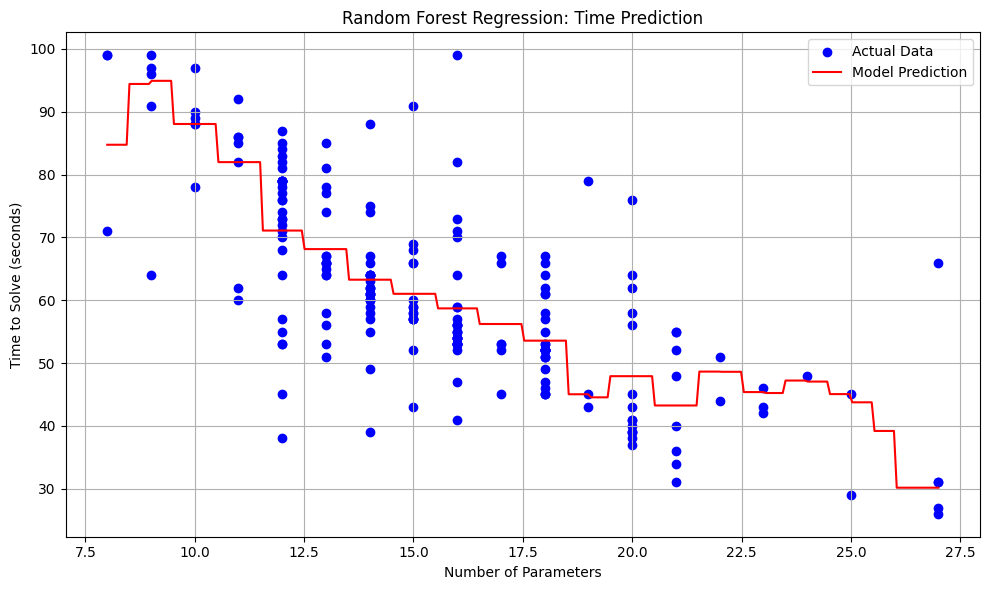

In [11]:
# If I give number of parameters, how much does it take to solve the game? 

df = pd.DataFrame(data, columns=["Parameters", "Time"])
X = df[["Parameters"]]
y = df["Time"]

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict
train_preds = model.predict(X_train)
test_preds = model.predict(X_test)

# Evaluate
train_rmse = np.sqrt(mean_squared_error(y_train, train_preds))
test_rmse = np.sqrt(mean_squared_error(y_test, test_preds))
r2_train = r2_score(y_train, train_preds)
r2_test = r2_score(y_test, test_preds)

print(f"Training RMSE: {train_rmse:.2f} seconds, R²: {r2_train:.2f}")
print(f"Testing RMSE: {test_rmse:.2f} seconds, R²: {r2_test:.2f}")


# Plot
plt.figure(figsize=(10,6))
plt.scatter(X, y, color='blue', label='Actual Data')
x_vals = np.linspace(X.min(), X.max(), 300).reshape(-1, 1)
y_vals = model.predict(x_vals)
plt.plot(x_vals, y_vals, color='red', label='Model Prediction')
plt.xlabel("Number of Parameters")
plt.ylabel("Time to Solve (seconds)")
plt.title("Random Forest Regression: Time Prediction")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [23]:
# Predict time for user input given the number of parameters
try:
  user_input = int(input("Enter number of parameters: "))
  input_df = pd.DataFrame({'Parameters': [user_input]})  # Match training feature name
  predicted_time = model.predict(input_df)[0]
  print(f"Predicted Time to Solve: {predicted_time:.2f} seconds")
except ValueError:
  print("Please enter a valid integer.")

Enter number of parameters:  10


Predicted Time to Solve: 88.06 seconds


# KNN Algorithm

Training Accuracy: 0.6918604651162791
Testing Accuracy: 0.5813953488372093

Classification Report (Test Set):
               precision    recall  f1-score   support

        Easy       0.68      0.79      0.73        19
        Hard       0.50      0.25      0.33         8
      Medium       0.47      0.50      0.48        16

    accuracy                           0.58        43
   macro avg       0.55      0.51      0.52        43
weighted avg       0.57      0.58      0.57        43



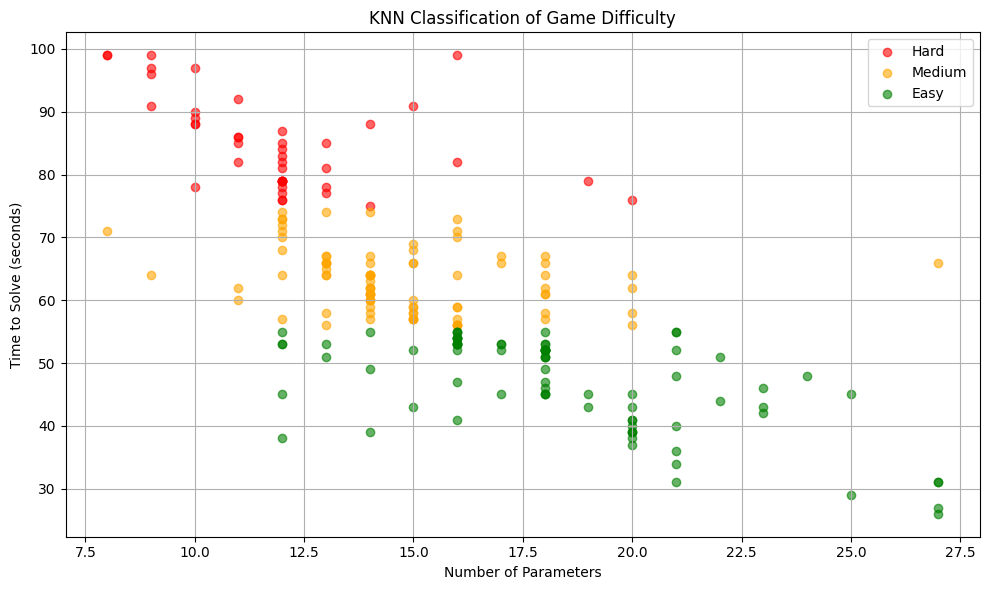

Enter the number of parameters:  14


Predicted Level: Medium


In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

df = pd.DataFrame(data, columns=["Parameters", "Time"])

kmeans = KMeans(n_clusters=3, random_state=42)
df['Cluster'] = kmeans.fit_predict(df[['Time']])
centers = kmeans.cluster_centers_.flatten()
sorted_centers = np.sort(centers)

# Thresholds for labeling
threshold1 = (sorted_centers[1] + sorted_centers[0]) / 2
threshold2 = (sorted_centers[2] + sorted_centers[1]) / 2

def label_cluster(ttl):
    if ttl < threshold1:
        return 'Easy'
    elif ttl < threshold2:
        return 'Medium'
    else:
        return 'Hard'

# Assign Levels
df['Level'] = df['Time'].map(label_cluster)

X = pd.DataFrame(df['Parameters'], columns=['Parameters'])
y = df['Level']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.2)

# KNN Classifier
knn_clf = KNeighborsClassifier(n_neighbors=3)
knn_clf.fit(X_train, y_train)

# Predictions
y_train_pred = knn_clf.predict(X_train)
y_test_pred = knn_clf.predict(X_test)

# Evaluation
print("Training Accuracy:", accuracy_score(y_train, y_train_pred))
print("Testing Accuracy:", accuracy_score(y_test, y_test_pred))
print("\nClassification Report (Test Set):\n", classification_report(y_test, y_test_pred))

# Prediction Function
def get_game_level(model, num_params):
    input_df = pd.DataFrame({'Parameters': [num_params]})
    return model.predict(input_df)[0]

# Plot results
plt.figure(figsize=(10, 6))
colors = {'Easy': 'green', 'Medium': 'orange', 'Hard': 'red'}

for label in df['Level'].unique():
    subset = df[df['Level'] == label]
    plt.scatter(subset['Parameters'], subset['Time'], label=label, alpha=0.6, color=colors[label])

plt.xlabel("Number of Parameters")
plt.ylabel("Time to Solve (seconds)")
plt.title("KNN Classification of Game Difficulty")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


try:
    user_input = int(input("Enter the number of parameters: "))
    level = get_game_level(knn_clf, user_input)
    print(f"Predicted Level: {level}")
except ValueError:
    print("Please enter a valid integer.")

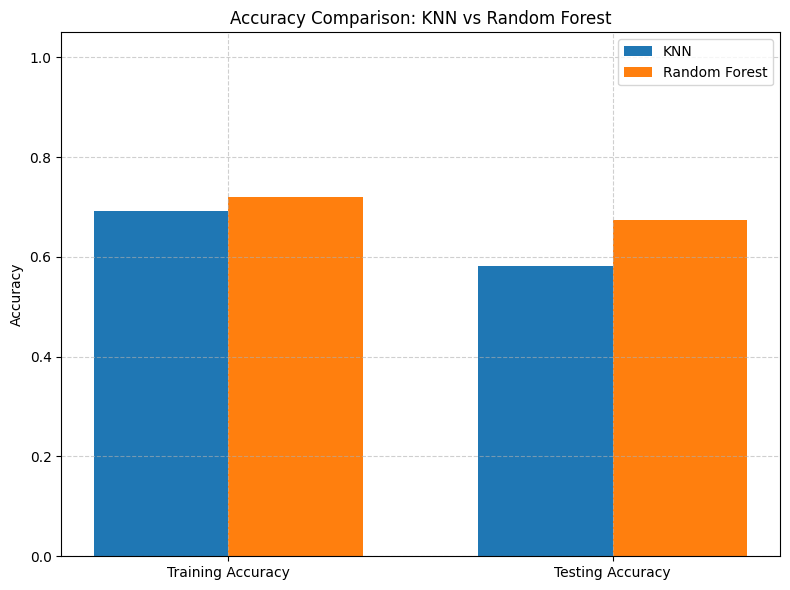

In [17]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix

# Random Forest Classifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

# Evaluate Random Forest
train_preds_rf = clf.predict(X_train)
test_preds_rf = clf.predict(X_test)
train_acc_rf = accuracy_score(y_train, train_preds_rf)
test_acc_rf = accuracy_score(y_test, test_preds_rf)

# Evaluate KNN
train_acc_knn = accuracy_score(y_train, y_train_pred)
test_acc_knn = accuracy_score(y_test, y_test_pred)

# Plotting accuracies
plt.figure(figsize=(8, 6))
bar_width = 0.35
labels = ['Training Accuracy', 'Testing Accuracy']
knn_scores = [train_acc_knn, test_acc_knn]
rf_scores = [train_acc_rf, test_acc_rf]

x = np.arange(len(labels))
plt.bar(x - bar_width/2, knn_scores, bar_width, label='KNN')
plt.bar(x + bar_width/2, rf_scores, bar_width, label='Random Forest')

plt.ylabel('Accuracy')
plt.ylim(0, 1.05)
plt.title('Accuracy Comparison: KNN vs Random Forest')
plt.xticks(x, labels)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()